In [155]:
import numpy as np

class teacher:
    def __init__(self,knowledge = []):
        self.knowledge = knowledge

class student:
    def __init__(self, who, knowledge, compete_will, execute,alpha):
        self.who = who # 学生编号
        self.knowledge = knowledge # 知识向量
        self.compete_will = compete_will # 竞合意愿
        self.execute = execute # 执行力
        self.rank_relative = 0 # 绝对排名
        self.rank_absolute = 0 # 相对排名
        self.input = 0  # 瞬时投入 = execute
        self.input_all = 0 # 累计投入
        self.output = 0  # 瞬时产量
        self.output_all = 0  # 累计产量
        self.reward = 0 # 瞬时回报
        self.reward_all = 0 # 累计回报
        self.link = [] # 邻居
        self.alpha = alpha # 创新能力

    def update_execute(self):
        # 方案一：用乘法，正反馈
#         if self.reward > 0:
#             self.execute = self.execute*1.1
#         if self.reward < 0:
#             self.execute = self.execute*0.9
#         方案一：用乘法，负反馈
#         if self.reward > 0:
#             self.execute = self.execute*0.9
#         if self.reward < 0:
#             self.execute = self.execute*1.1
        # 用乘法，和之前的执行力相关，导致无论是正反馈还是负反馈，最后的系统的input总是下降趋势
#         方案一：用加法
#         if self.reward > 0:
#             self.execute = self.execute + 0.1
#         if self.reward < 0:
#             self.execute = self.execute - 0.1
#         负向
#         if self.reward > 0:
#             self.execute = max(0,self.execute - (0.1+(random.random()-0.5)))
#         if self.reward < 0:
#             self.execute = min(1,self.execute + (0.5+(random.random()-0.5)))
#             #(0.1+(random.random()-0.5))
        if self.reward > 0:
            self.execute = max(0,self.execute - 0.05)
        if self.reward < 0:
            self.execute = min(1,self.execute + 0.08)
            #(0.1+(random.random()-0.5))

    def update_output(self):
        self.output = np.sqrt(sum([x * x for x in self.knowledge])) * ( self.input ) * max(0,min(1,random.gauss(1,0.2))) 
    def update_input(self):
        self.input = self.execute *  max(0,min(1,random.gauss(1,0.2))) # 加正态分布扰动
    def update_input_all(self):
        self.input_all += self.input
    def update_output_all(self):
        self.output_all += self.output




def knowledge_flow(S):
    for si in S:
        for d in range(Dimension):
            # 学生与老师交互
            if si.knowledge[d] < T.knowledge[d]:
                beta = (1 / (1 + 1 / sigma + np.exp(-(si.knowledge[d] + T.knowledge[d]))))
                # print(beta)
                si.knowledge[d] = beta * (T.knowledge[d] - si.knowledge[d]) + (si.alpha/1000 + 1) * (si.knowledge[d])
#                 si.knowledge[d] = beta * (T.knowledge[d] - si.knowledge[d]) + (1) * (si.knowledge[d])
            # 学生与学生交互
            for j in si.link:
                sj = S[j]
                if sj.compete_will[d] == 0 and sj.knowledge[d] > si.knowledge[d]:
                    beta = (1 / (1 + 1 / sigma + np.exp(-(si.knowledge[d] + sj.knowledge[d]))))
                    # print(beta)
                    si.knowledge[d] = beta * (sj.knowledge[d] - si.knowledge[d]) + (si.alpha/1000 + 1) * (si.knowledge[d])
#                     si.knowledge[d] = beta * (sj.knowledge[d] - si.knowledge[d]) + (1) * (si.knowledge[d])


import math
def update_rank_reward(S):
    for si in S:
        last_rank_relative = si.rank_relative
        last_rank_absolute = si.rank_absolute
        S_i = [x for x in S if x.who in si.link] # 邻居
        rank = 1
        for i in S_i:
            if i.output > si.output:
                rank += 1
        tmp = rank + random.choice([-1,1])*np.log(len(S_i)+1) # log2 待定，4人团体，排名波动2有点夸张，
        tmp = math.floor(tmp) # 向下取整
        if tmp <= 0:
            si.rank_relative = rank
        elif tmp <= len(S_i)+1:
            si.rank_relative = tmp
        else:
            si.rank_relative = len(S_i)+1
        # print(last_rank_absolute)

        if tick % Time == 0:
            S_all = sorted(S, key=lambda x: x.output, reverse=True)
            rank2 = S_all.index(si) + 1 # 全局排名
            si.rank_absolute = rank2
            if tick == 0:
                si.reward = 0
            else:
                si.reward = (-1)*(si.rank_absolute - last_rank_absolute) / np.log2(1 + last_rank_absolute)
        else:
            si.reward = (-1)*(si.rank_relative - last_rank_relative) / np.log2(1 + last_rank_relative)
#         si.reward = (-1)*(si.rank_relative - last_rank_relative) / np.log2(1 + last_rank_relative)
        si.reward_all += si.reward


def update_compete_will(S):
    if tick % Time == 0:   
        for si in S:
            if 0.5*N <= si.rank_absolute and si.rank_absolute < 1.5*N:
                 for j in range(nstudent):
                    if 0.5*N <= S[j].rank_absolute and S[j].rank_absolute < 1.5*N: # 0.5,1.5可调
                        si.compete_will[j] = 1
                    else:
                        si.compete_will[j] = 0
            else:
                for j in range(nstudent):
                    si.compete_will[j] = 0

def update_execute(S):
    for si in S:
        si.update_execute()

def add_edge(S):
    if tick == 0 or tick % 25 != 0:
        return
    for si in S:
        for i in range(nstudent):
            neibor = si.link
            if i not in neibor:
                if random.random() < link_prob:
                    si.link.append(i)

import random


def get_num():
    x = np.random.normal(loc=0.5, scale=0.1, size=1)[0]
    if x > 1 or x < 0:
        return get_num()
    else:
        return x


def setup():
    S = []
    for i in range(nstudent):
        S.append(student(i, [],[0]*nstudent,get_num(),get_num()))
#         S.append(student(i, [],[1]*nstudent,get_num(),get_num())) # 初始为竞争状态

    for i in range(Dimension):
        np.random.seed(random.randint(0,300))
        for x in S:
            x.knowledge.append(get_num())

    
    return S

def setup_edges(S,G):
    # 初始化连边
    for i in range(nstudent):
        S[i].link =list(G.neighbors(i))
        


def get_attr_all(S):
    # 返回某一属性的全体学生智能体的值,list
    res = {}
    for si in S:
        for k,v in vars(si).items():
            if k in res:
                res[k].append(v)
            else:
                res[k] = [v]
    return res



def cal_CV(l):
    sd = np.std(l)
    mean = np.mean(l)
    if mean == 0:
        return 0
    return sd/mean



import matplotlib.pyplot as plt

In [4]:
import networkx as nx 

In [161]:
Dimension = 10
# sigma = 0.1
sigma = 0.1
# alpha = 0.1
alpha = 0.1
# will_rate = 0.4
# link_prob = 0.05
# link_prob = 1
link_prob = 0.05
Time = 300 
tick = 0
days = 200
nstudent = 60
N = 0.15 * nstudent
# 内卷指标
input_system = []
input_all_system = []
output_system = []
output_all_system = []
reward_system = []
reward_all_system = []
input_system_cv = []
input_all_system_cv = []
output_system_cv = []
output_all_system_cv = []
reward_system_cv = []
reward_all_system_cv = []
ROI = []
ROI_all = []

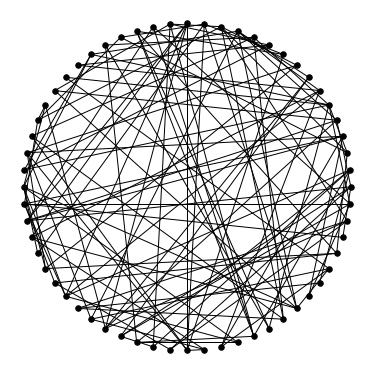

In [124]:
G = nx.generators.watts_strogatz_graph(nstudent,4,1)
# G = nx.generators.watts_strogatz_graph(20,4,0)
# G = nx.generators.random_regular_graph(3,nstudent)
plt.figure(figsize=(5,5))
pos = nx.circular_layout(G)
nx.draw(G,pos,node_size = 30,node_color = 'black')

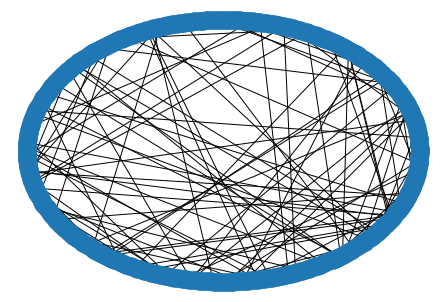

In [386]:
G = nx.generators.watts_strogatz_graph(nstudent,3,0.2)

pos = nx.circular_layout(G)
nx.draw(G,pos)


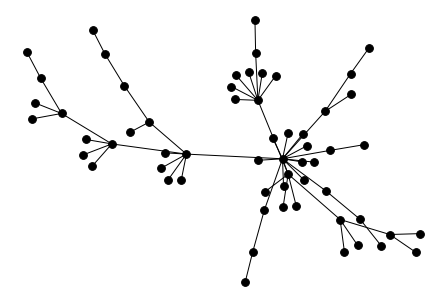

In [130]:
G = nx.generators.barabasi_albert_graph(nstudent,1)
# plt.figure(figsize=(5,5))
pos = nx.spring_layout(G)
nx.draw(G,pos,node_size = 60,node_color = 'black')
plt.show()

In [162]:
T = teacher()
T.knowledge = [1] * Dimension
# print(T.knowledge)
# print(get_num())

S = setup()
# G = nx.generators.barabasi_albert_graph(nstudent,1)




setup_edges(S,G)
# update_rank_reward(S)
# update_compete_will(S) 
# print(get_attr_all(S))
data = {}
while (tick < days):
    print('day ',tick)
    for k,v in vars(S[0]).items():
        print(k,v)
    print('----'*30)
    for x in S:
        x.update_input()
        x.update_input_all()
        x.update_output()
        x.update_output_all()
    update_rank_reward(S)
#     update_compete_will(S)
    update_execute(S)
    print('day ',tick)
    for k,v in vars(S[0]).items():
        print(k,v)
    knowledge_flow(S)   
    add_edge(S) # link_prob 和初始化网络时的link_prob相同，可能不合适
    res = get_attr_all(S)
    data['day '+str(tick)] = res

    input_system.append(sum(res['input']))
    input_system_cv.append(cal_CV(res['input']))

    input_all_system.append(sum(res['input_all']))
    input_all_system_cv.append(cal_CV(res['input_all']))

    output_system.append(sum(res['output']))
    output_system_cv.append(cal_CV(res['output']))

    output_all_system.append(sum(res['output_all']))
    output_all_system_cv.append(cal_CV(res['output_all']))

    reward_system.append(sum(res['reward']))
    reward_system_cv.append(cal_CV(res['reward']))

    reward_all_system.append(sum(res['reward_all']))
    reward_all_system_cv.append(cal_CV(res['reward_all']))

    # ROI.append() = []
    # ROI_all = []
    # break
    tick += 1
import pickle
with open(r'C:\Users\yeshang\Desktop\内卷仿真\实验数据\价值评价\data_4_10_T=300','wb') as f:
    pickle.dump(data,f)

day  0
who 0
knowledge [0.4287609337949412, 0.3701428951665456, 0.5473717081265741, 0.5441227486885042, 0.5454922361215897, 0.5445096277646915, 0.49321947635374586, 0.4452098486049668, 0.44019516762129696, 0.5472985831489979]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.3071613484609731
rank_relative 0
rank_absolute 0
input 0
input_all 0
output 0
output_all 0
reward 0
reward_all 0
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  0
who 0
knowledge [0.4287609337949412, 0.3701428951665456, 0.5473717081265741, 0.5441227486885042, 0.5454922361215897, 0.5445096277646915, 0.49321947635374586, 0.4452098486049668, 0.44019516762129696, 0.5472985831489979]
compete_will [0, 0, 0, 

input 0.47209569987792327
input_all 7.092539471843398
output 1.4059616948513276
output_all 16.785082538959692
reward 2.2018548790640344
reward_all -0.7140440957198844
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59]
alpha 0.44013941108886623
day  22
who 0
knowledge [0.9546723526111603, 0.9659566402498765, 0.9691264744850167, 0.9675510706537798, 0.95929372623476, 0.9562492991661176, 0.9553500926870994, 0.962089074970107, 0.9569271842968674, 0.9639848276145151]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.42716134846097337
rank_relative 7
rank_absolute 54
input 0.47209569987792327
input_all 7.092539471843398
output 1.4059616948513276
output_all 16.785082538959692
reward 2.2018548790640344
reward_all -0.7140440957198844
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59]
alpha 0.44013941108886623
---------------

execute 0.537161348460973
rank_relative 14
rank_absolute 54
input 0.587161348460973
input_all 15.234456375782035
output 1.6020571569125581
output_all 39.19126999814345
reward 0.25
reward_all -6.827939982795627
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  38
who 0
knowledge [1.0007494842599345, 1.0016106511868137, 1.001791509823855, 1.0018851081822946, 1.0006505995354011, 1.0017910344267527, 1.00126679646319, 1.0003235014466112, 1.0006645385208297, 1.0042134554374378]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.6171613484609729
rank_relative 21
rank_absolute 54
input 0.537161348460973
input_all 15.771617724243008
output 1.7011931973395555
output

reward 4.1439815477251
reward_all -12.89153471215516
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44]
alpha 0.44013941108886623
day  56
who 0
knowledge [1.022403289640301, 1.0239269642889735, 1.0234444293818072, 1.023602562848052, 1.0225092355672558, 1.0238824042622139, 1.023555401477894, 1.0224999791590075, 1.0227633778342475, 1.026003278827732]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.9371613484609722
rank_relative 4
rank_absolute 54
input 0.9871613484609723
input_all 27.57146344011534
output 3.13304413672352
output_all 76.13873608937455
reward 4.1439815477251
reward_all -12.89153471215516
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44]
alpha 0.44013941108886623
-----------------------------------------------------------------------------------

reward 2.0490322382725767
reward_all -28.07960878780612
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  73
who 0
knowledge [1.0485432996041126, 1.0501660936224735, 1.0497506123844342, 1.0498915494990355, 1.0490054539155746, 1.050116800264743, 1.0498410168946342, 1.048561872785604, 1.049175964868627, 1.0517622769949035]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.9799999999999999
rank_relative 12
rank_absolute 54
input 0.8999999999999999
input_all 43.57166944578115
output 2.9874470018631674
output_all 123.52889571772182
reward -0.27894294565112987
reward_all -28.35855173345725
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17,

rank_relative 16
rank_absolute 54
input 0.9207863764366445
input_all 54.92152687065675
output 2.457569316055401
output_all 159.67948321107718
reward -6.5
reward_all -47.167722581579355
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  87
who 0
knowledge [1.0769083729024707, 1.078396090291836, 1.078410917429875, 1.0780449979150937, 1.077840547610441, 1.0783281823343986, 1.0786125027350777, 1.0768614352503667, 1.0778668221865946, 1.0810220499575527]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 1
rank_relative 25
rank_absolute 54
input 0.8699693070779697
input_all 55.79149617773472
output 2.2681145591300984
output_all 161.94759

input 1
input_all 66.56456424642897
output 3.4951422644483947
output_all 196.97238996615243
reward 4.421294589150075
reward_all -54.23445343678546
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53]
alpha 0.44013941108886623
day  100
who 0
knowledge [1.1064490701325485, 1.1081780775646946, 1.1072560967952796, 1.1073136738109968, 1.1062138291894879, 1.1077753715138587, 1.1081412326982167, 1.1062095500819789, 1.1074867807077442, 1.1106222708185691]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.95
rank_relative 2
rank_absolute 54
input 1
input_all 66.56456424642897
output 3.4951422644483947
output_all 196.97238996615243
reward 4.421294589150075
reward_all -54.23445343678546
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 

reward -5.168118696880717
reward_all -76.10955581368808
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42]
alpha 0.44013941108886623
day  112
who 0
knowledge [1.1376777170174854, 1.1392632550282087, 1.1386705376054351, 1.1393152257724242, 1.1383325876198387, 1.1388726742679351, 1.1397295340071314, 1.1383377543001887, 1.1393038778446223, 1.1422254320633407]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.9799999999999999
rank_relative 16
rank_absolute 54
input 0.7539621781850195
input_all 77.47095896726951
output 2.709439352083741
output_all 233.67518016305675
reward -5.168118696880717
reward_all -76.10955581368808
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42]
alpha 0.44013941108886623
-----

day  124
who 0
knowledge [1.1706462666978605, 1.1726520780471286, 1.1712214526417033, 1.1720065605683738, 1.1715980439661113, 1.1721973743794103, 1.173547578220827, 1.1714237452434986, 1.1723444829709995, 1.1751992537382532]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.8799999999999998
rank_relative 21
rank_absolute 54
input 0.6366122662850763
input_all 87.94304745707099
output 2.3540425082717276
output_all 269.0015833381967
reward 0.4362085839710631
reward_all -93.0965732382187
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  124
who 0
knowledge [1.1706462666978605, 1.1726520780471286, 1.1712214526417033, 1.1

input 0.8344724387596267
input_all 98.01876841679392
output 2.7072537385023017
output_all 302.06691218036985
reward 2.7294263065130084
reward_all -95.06227976370928
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42, 43, 46, 58]
alpha 0.44013941108886623
day  136
who 0
knowledge [1.2067316416896958, 1.2085858625214754, 1.2080262455198412, 1.2083429999758337, 1.2068949180845379, 1.2081707725978146, 1.208977365299491, 1.207753282686455, 1.2091603720834512, 1.2123137236215589]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.95
rank_relative 20
rank_absolute 54
input 0.8344724387596267
input_all 98.01876841679392
output 2.7072537385023017
output_all 302.06691218036985
reward 2.7294263065130084
reward_all -95.06227976370928
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 3

who 0
knowledge [1.238265438917534, 1.2400118060976688, 1.2390958745192837, 1.2402848859777247, 1.2383431244405092, 1.2396897330086107, 1.2405085838070788, 1.2404598004677558, 1.23987355653216, 1.2439760045445467]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.95
rank_relative 6
rank_absolute 54
input 1
input_all 106.50555075868876
output 3.911713463922709
output_all 332.63178021523544
reward 5.458852613026017
reward_all -97.93634124050072
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42, 43, 46, 58]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  146
who 0
knowledge [1.238265438917534, 1.2400118060976688, 1.2390958745192837, 1.2402848859777247, 1.238343124440

who 0
knowledge [1.2788903045862923, 1.2817116599528098, 1.2809926747085014, 1.2819037916475498, 1.280643073052944, 1.2805198082963802, 1.2819503720290581, 1.282222547549729, 1.2816952070337397, 1.2848279870382975]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.95
rank_relative 30
rank_absolute 54
input 0.7638781598625992
input_all 117.91005703836103
output 2.263603241934269
output_all 373.7577791213436
reward 0.2
reward_all -107.81502095216028
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42, 43, 46, 58, 9]
alpha 0.44013941108886623
day  159
who 0
knowledge [1.2831275052457896, 1.284777384697211, 1.2846158893711197, 1.2854708947058913, 1.284232834657023, 1.284692773941261, 1.2861100281057911, 1.2858497437870193, 1.2859407907865197, 1.2890284000653927]
compete_w

day  169
who 0
knowledge [1.3198370569785536, 1.3219831575026122, 1.3228908527532632, 1.3236765826665104, 1.3217727710281393, 1.3219265364129094, 1.3237837467321936, 1.323437674838142, 1.3232569689691074, 1.3262890412672015]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.9699999999999995
rank_relative 16
rank_absolute 54
input 0.8899999999999996
input_all 126.775416989197
output 3.607229490186009
output_all 408.31959160401084
reward -6.5
reward_all -111.33551110241461
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42, 43, 46, 58, 9]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  169
who 0
knowledge [1.3198370569785536, 1.3219831575026122, 1.3228908527532632, 1

day  179
who 0
knowledge [1.3597060148158904, 1.3618863053255466, 1.3619971821884227, 1.362747806597032, 1.3603148011110215, 1.3612250054779311, 1.3623515772395012, 1.3613099735626149, 1.3623130240283698, 1.3662468483342152]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.8299999999999997
rank_relative 20
rank_absolute 54
input 0.8799999999999998
input_all 135.61501864324924
output 3.778678738588559
output_all 441.07444463959496
reward 1.4561021837355663
reward_all -127.80183341211236
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42, 43, 46, 58, 9]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  179
who 0
knowledge [1.3597060148158904, 1.3618863053255466, 1.361

input 0.9521053924994707
input_all 146.3715778128148
output 4.05867666000731
output_all 486.47262044295917
reward 2.504372735666483
reward_all -133.96177781483823
link [1, 2, 3, 6, 7, 10, 14, 18, 26, 29, 30, 32, 35, 51, 59, 17, 39, 45, 54, 55, 15, 44, 25, 34, 48, 52, 53, 19, 24, 42, 43, 46, 58, 9]
alpha 0.44013941108886623
------------------------------------------------------------------------------------------------------------------------
day  191
who 0
knowledge [1.410375359449865, 1.412574033360947, 1.412441055159104, 1.4147454456762125, 1.4109548870790274, 1.4124371599196184, 1.4136711352171856, 1.4126350915808572, 1.4137505960455037, 1.4168019983293805]
compete_will [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
execute 0.95
rank_relative 9
rank_absolute 54
input 0.95
input_all 147.32157781281478
output 3.9618695069564405
output_all 490.4344899499

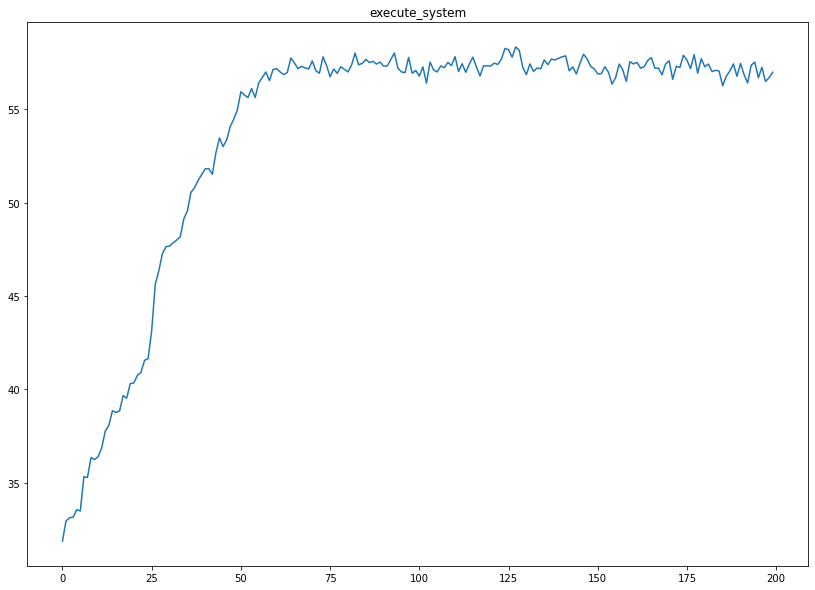

In [78]:
#
l = []
plt.figure(figsize=(14,10))
for i in range(days):
    l.append(sum(data['day '+str(i)]['execute']))
plt.title('execute_system')
plt.plot(l) 

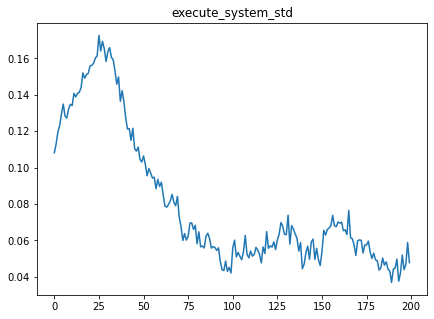

In [64]:
l = []
plt.figure(figsize=(7,5))
for i in range(days):
    l.append(np.std(data['day '+str(i)]['execute']))
plt.title('execute_system_std')
plt.plot(l) 

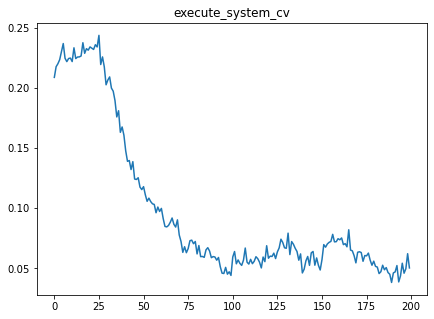

In [65]:
l = []
plt.figure(figsize=(7,5))
for i in range(days):
    l.append(cal_CV(data['day '+str(i)]['execute']))
plt.title('execute_system_cv')
plt.plot(l) 

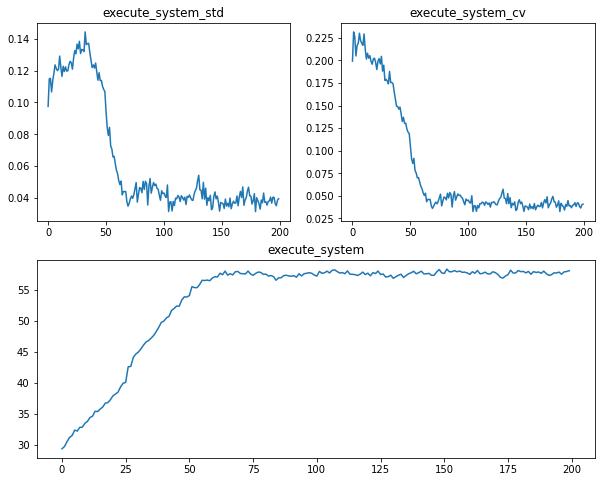

In [163]:
l1 = []
l2 = []
l3 = []
plt.figure(figsize=(10,8))
for i in range(days):
    l1.append(sum(data['day '+str(i)]['execute']))
    l2.append(np.std(data['day '+str(i)]['execute']))
    l3.append(cal_CV(data['day '+str(i)]['execute']))
plt.subplot(2,2,(3,4))
plt.title('execute_system')
plt.plot(l1) 
plt.subplot(2,2,1)
plt.title('execute_system_std')
plt.plot(l2) 
plt.subplot(2,2,2)
plt.title('execute_system_cv')
plt.plot(l3) 

[(0, 0), (1, 11), (2, 26), (3, 17), (4, 15), (5, 14), (6, 11), (7, 10), (8, 18), (9, 16), (10, 14), (11, 10), (12, 20), (13, 13), (14, 11), (15, 14), (16, 11), (17, 16), (18, 7), (19, 13), (20, 15), (21, 12), (22, 14), (23, 10), (24, 15), (25, 33), (26, 38), (27, 19), (28, 23), (29, 32), (30, 25), (31, 20), (32, 26), (33, 17), (34, 19), (35, 31), (36, 19), (37, 25), (38, 27), (39, 20), (40, 26), (41, 26), (42, 17), (43, 20), (44, 24), (45, 27), (46, 17), (47, 24), (48, 20), (49, 20), (50, 32), (51, 35), (52, 19), (53, 31), (54, 28), (55, 18), (56, 29), (57, 24), (58, 29), (59, 19), (60, 22), (61, 28), (62, 24), (63, 22), (64, 26), (65, 22), (66, 27), (67, 27), (68, 28), (69, 24), (70, 27), (71, 25), (72, 30), (73, 20), (74, 35), (75, 20), (76, 37), (77, 30), (78, 23), (79, 31), (80, 22), (81, 26), (82, 30), (83, 30), (84, 23), (85, 33), (86, 26), (87, 26), (88, 21), (89, 26), (90, 22), (91, 34), (92, 22), (93, 26), (94, 27), (95, 23), (96, 31), (97, 25), (98, 31), (99, 23), (100, 22), 

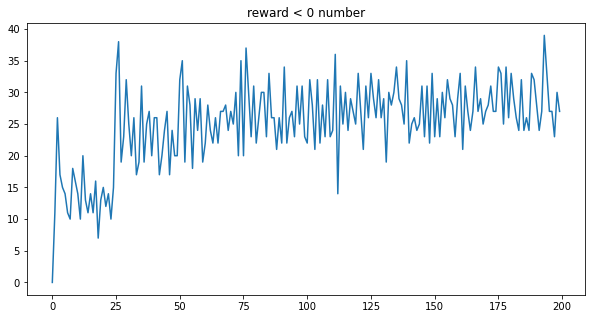

In [43]:
#reward 少于0 的数量
l = []
plt.figure(figsize=(10,5))
for i in range(days):
    l.append(len([x for x in data['day '+str(i)]['reward'] if x < 0 ] ))
print(list(enumerate(l)))
plt.title('reward < 0 number')
plt.plot(l) 

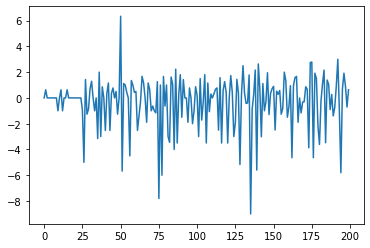

In [44]:
l = []
for i in range(days):
    res =data['day '+str(i)]
    l.append(res['reward'][24])
plt.plot(l) 

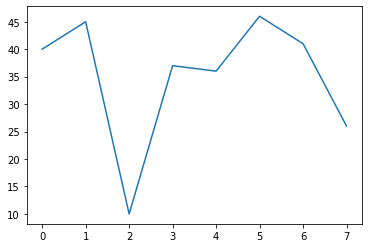

In [45]:
l=[]
for i in range(0,200,25):
    l.append(data['day '+str(i)]['rank_absolute'][24])
plt.plot(l)

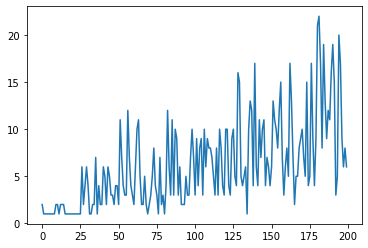

In [46]:
l=[]
for i in range(0,200):
    l.append(data['day '+str(i)]['rank_relative'][24])
plt.plot(l)

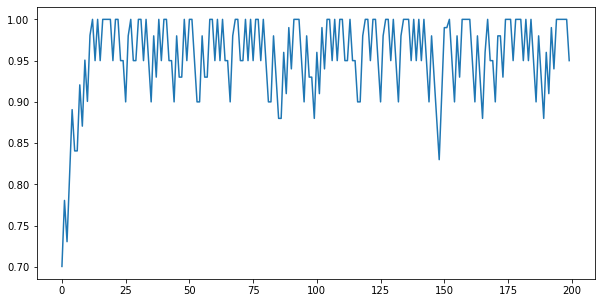

In [47]:
l = []
plt.figure(figsize=(10,5))
for i in range(days):
    res =data['day '+str(i)]
    l.append(res['execute'][0])
plt.plot(l) 

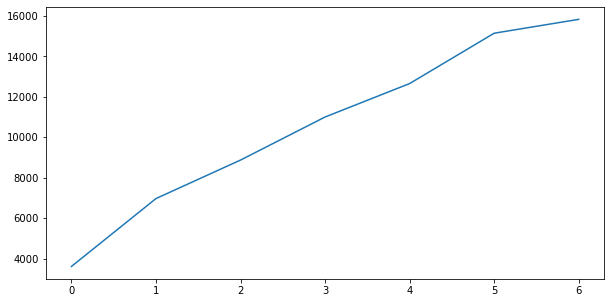

In [48]:
# 排名波动
l = []
plt.figure(figsize=(10,5))
for i in [0,25,50,75,100,125,150]:
    res = [abs(x-y) for x in data['day '+str(i)]['rank_relative'] for y in data['day '+str(i+25)]['rank_relative']]
    l.append(sum(res))
plt.plot(l) 


In [54]:
print(reward_system_cv)

[0, 109.2422670540949, -2.422289387283889, -12.95593093332453, -4.566106119095358, -6.940740337554554, 2025.6781610537437, -10.653977118647584, -3.501317506099888, -4.58205423261874, -12.276897534891908, 67.45124444140676, -3.0382002278727662, -14.936221097937585, -15.121219163013636, -5.954476847233193, -23.231653402861934, -4.128604797318658, 53.33876285987606, -9.88502876536118, -4.857530381721212, -11.305670568463837, -5.270944096781215, -19.011774540389307, -4.1862754897981915, -5.05018653015129, -1.3551461418084845, -84.12167407206044, -5.915837260084306, -2.348873407224569, -5.701304192225892, -7.3140402080928295, -3.9691424613576602, -6.448965320817058, 1859.4117242948532, -3.1346994641084023, -7.711865303841007, -4.9868969800152145, -3.052863428492802, -8.735858985705228, -3.3186663422009777, -4.535672216075075, -7.594820492847367, -4.344149390842296, -4.5738061525714135, -2.5490015097587038, 192.30071998154088, -4.297531596147556, -4.0697006865667005, -9.291008905264016, -5.2

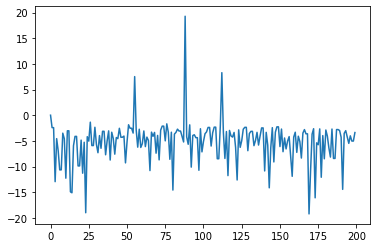

In [57]:
l = []
for i in range(len(reward_system_cv)):
    if abs(reward_system_cv[i])>20:
        l.append(reward_system_cv[i+1])
    else:
        l.append(reward_system_cv[i])
plt.plot(l)
    

Text(0.5, 1.0, 'reward_system_cv')

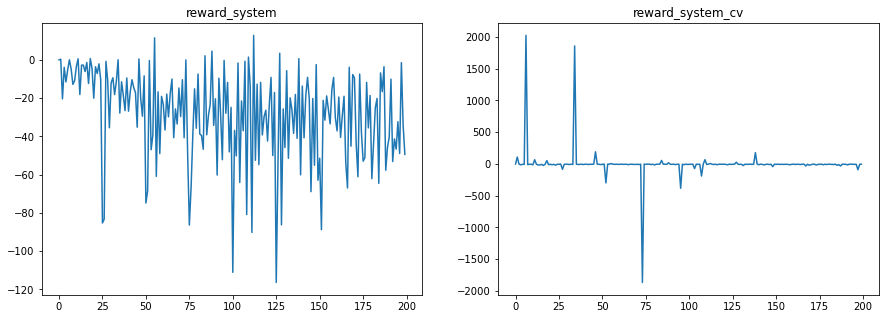

In [49]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(reward_system)
plt.title('reward_system')
plt.subplot(1,2,2)
plt.plot(reward_system_cv)
plt.title('reward_system_cv')

Text(0.5, 1.0, 'reward_all_system_cv')

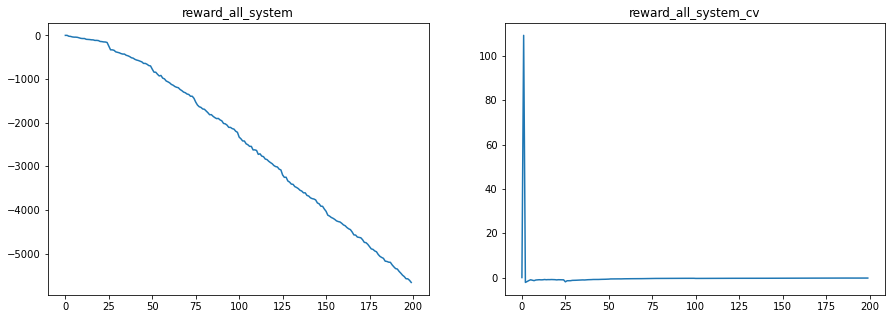

In [50]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(reward_all_system)
plt.title('reward_all_system')
plt.subplot(1,2,2)
plt.plot(reward_all_system_cv)
plt.title('reward_all_system_cv')

Text(0.5, 1.0, 'ROI')

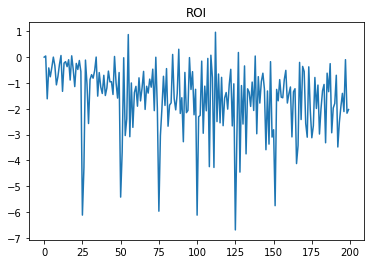

In [59]:
plt.plot([x for x in range(days)], [x / y for x, y in zip(reward_system, input_system)])
plt.title('ROI')

Text(0.5, 1.0, 'ROI')

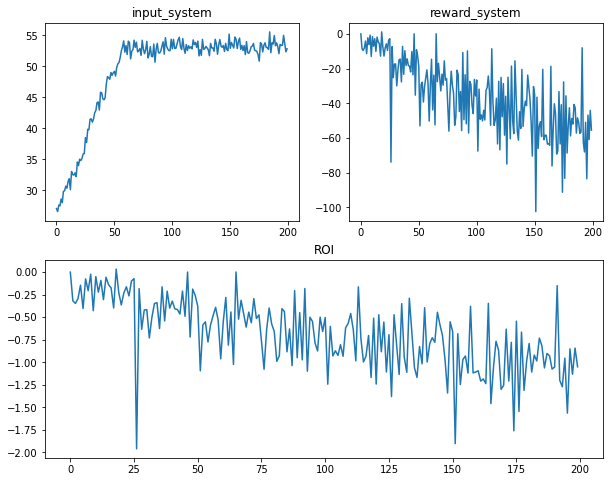

In [164]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(input_system)
plt.title('input_system')
plt.subplot(2, 2, 2)
plt.plot(reward_system)
plt.title('reward_system')
plt.subplot(2,2,(3,4))
plt.plot([x for x in range(days)], [x / y for x, y in zip(reward_system, input_system)])
plt.title('ROI')

Text(0.5, 1.0, 'output_all_system_cv')

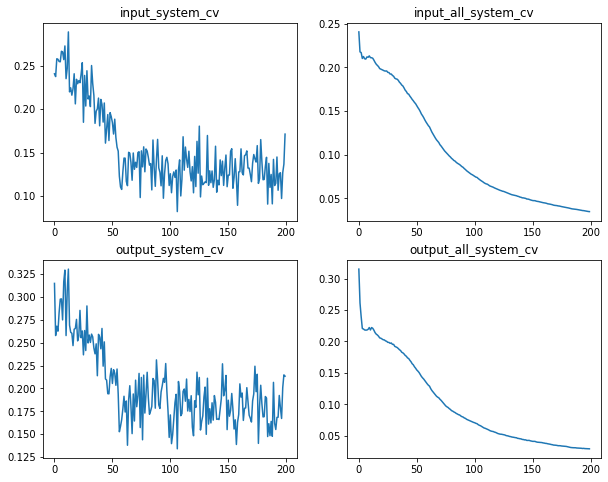

In [165]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(input_system_cv)
plt.title('input_system_cv')
plt.subplot(2, 2, 2)
plt.plot(input_all_system_cv) 
plt.title('input_all_system_cv')
plt.subplot(2,2,3) 
plt.plot(output_system_cv)
plt.title('output_system_cv')
plt.subplot(2, 2, 4)
plt.plot(output_all_system_cv)  
plt.title('output_all_system_cv')


In [91]:
print(input_all_system_cv)
print(output_all_system_cv)

[0.18527204864523322, 0.16989264125249015, 0.17639837163559516, 0.178050880289133, 0.18007940012507728, 0.17671063966118963, 0.16968128321914475, 0.17193426326887915, 0.17093413492843046, 0.17266386720069607, 0.17038691294876263, 0.17090131916079107, 0.1702555400220012, 0.16966521357853895, 0.16845365868837875, 0.1669665920100505, 0.16505679671766554, 0.16534252308164327, 0.16577781008222697, 0.16652458901072592, 0.1651242768875639, 0.1661988632044751, 0.1656299305854234, 0.16513841108236818, 0.16477109422191816, 0.16484418568115602, 0.16306633606457785, 0.16175759984140597, 0.15925461231385, 0.1581142325209367, 0.15685441483492157, 0.15602686225437298, 0.15376452451671135, 0.15164620295614442, 0.1515181717885712, 0.15075139582497238, 0.14923552404636947, 0.1476465518827404, 0.14603702426712983, 0.1452466343819454, 0.14346388411220892, 0.1418850049043188, 0.14018232618880352, 0.1378046302653087, 0.1364909490820051, 0.1350210881659466, 0.1330512017315284, 0.13208220825010358, 0.13048396

Text(0.5, 1.0, 'ROI_all')

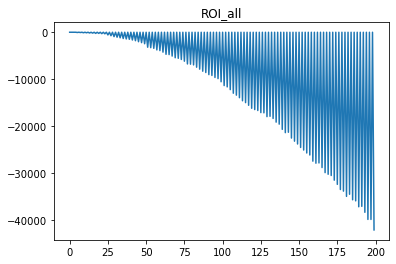

In [58]:
plt.plot([x for x in range(days)], [x / y for x, y in zip(reward_all_system, input_all_system)])
plt.title('ROI_all')

Text(0.5, 1.0, 'input_system_cv')

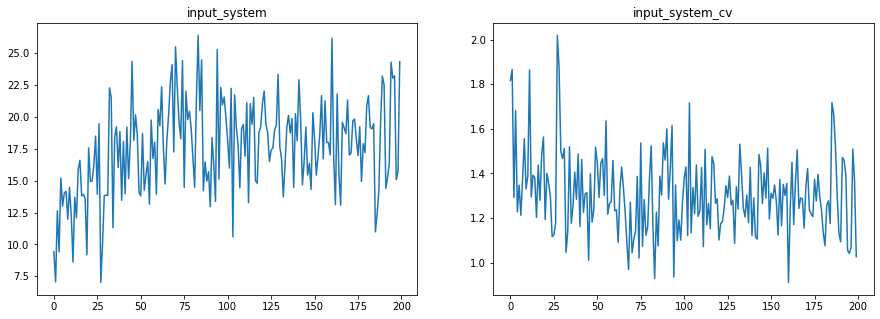

In [60]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(input_system)
plt.title('input_system')
plt.subplot(1,2, 2)
plt.plot(input_system_cv)
plt.title('input_system_cv')

Text(0.5, 1.0, 'output_system_cv')

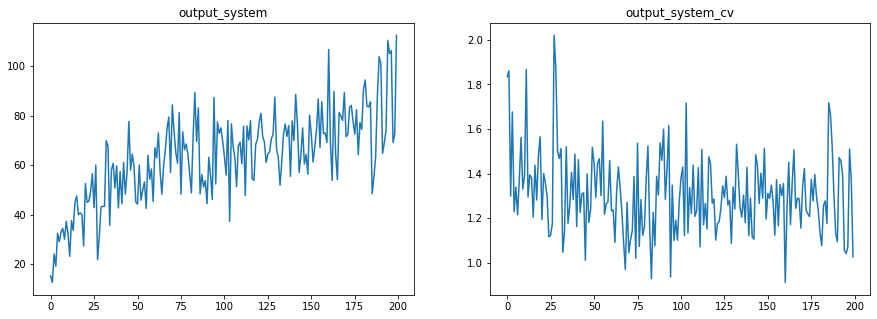

In [61]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(output_system)
plt.title('output_system')
plt.subplot(1,2, 2)
plt.plot(output_system_cv)
plt.title('output_system_cv')
# print(output_system)
# print(output_system_cv)